In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df =pd.read_excel(r"\Users\Acer\OneDrive\Skrivbord\projektarbete\corona_tested_individuals.xlsx")

In [3]:
print(df)

        test_date cough fever sore_throat shortness_of_breath head_ache  \
0      2020-04-30     0     0           0                   0         0   
1      2020-04-30     1     0           0                   0         0   
2      2020-04-30     0     1           0                   0         0   
3      2020-04-30     1     0           0                   0         0   
4      2020-04-30     1     0           0                   0         0   
...           ...   ...   ...         ...                 ...       ...   
278843 2020-03-11     0     0           0                   0         0   
278844 2020-03-11     0     0           0                   0         0   
278845 2020-03-11     0     0           0                   0         0   
278846 2020-03-11     0     0           0                   0         0   
278847 2020-03-11     0     0           0                   0         0   

       corona_result age_60_and_above  gender         test_indication  
0           negative       

In [4]:
df.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278848.0,278848.0,278848.0,278848.0,278848.0,278848,278848,278848,278848
unique,51,3.0,3.0,3.0,3.0,3.0,3,3,3,3
top,2020-04-20 00:00:00,0.0,0.0,0.0,0.0,0.0,negative,None,female,Other
freq,10921,236368.0,256844.0,276921.0,277270.0,276433.0,260227,127320,130158,242741
first,2020-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   test_date            278848 non-null  datetime64[ns]
 1   cough                278848 non-null  object        
 2   fever                278848 non-null  object        
 3   sore_throat          278848 non-null  object        
 4   shortness_of_breath  278848 non-null  object        
 5   head_ache            278848 non-null  object        
 6   corona_result        278848 non-null  object        
 7   age_60_and_above     278848 non-null  object        
 8   gender               278848 non-null  object        
 9   test_indication      278848 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 21.3+ MB


In [6]:
y =df['corona_result']
print("negativa resultat:",list(y).count('negative'))
print("positiva resultat:",list(y).count('positive'))

negativa resultat: 260227
positiva resultat: 14729


In [7]:
df_result = df.groupby('corona_result').size()
df_result

corona_result
negative    260227
other         3892
positive     14729
dtype: int64

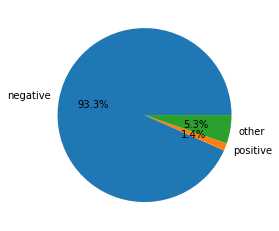

In [8]:
plt.pie(df_result.values, labels = ['negative','positive','other'], autopct ='%1.1f%%')
plt.show()

In [9]:
#så av alla tester som gjordes var det 93.3% som inte hade covid-19 men 1.4% som hade det, men vad innebär då resterande 5.3% för något?

In [10]:
df_gender = df.groupby(['gender','corona_result']).size()
df_gender

gender  corona_result
None    negative          17876
        other               518
        positive           1169
female  negative         122500
        other              1617
        positive           6041
male    negative         119851
        other              1757
        positive           7519
dtype: int64

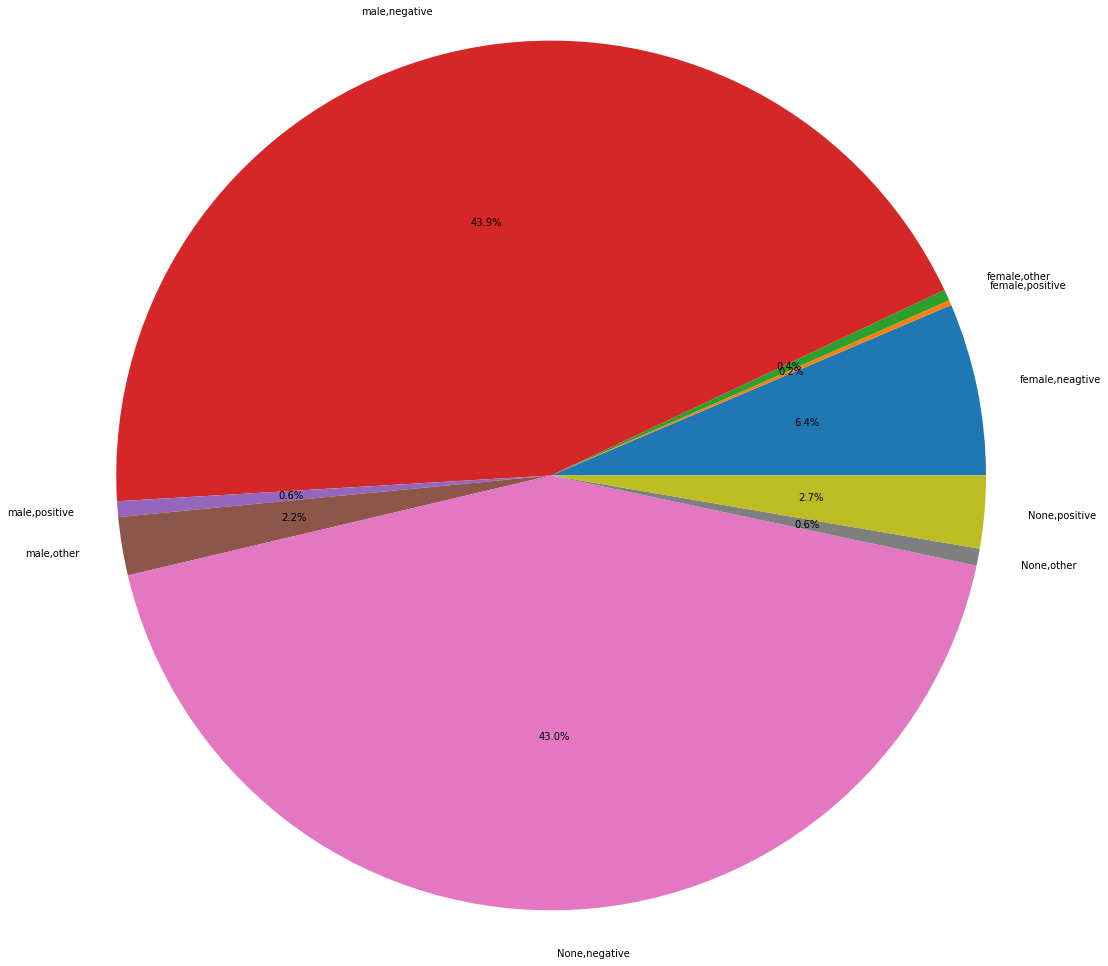

In [11]:
plt.pie(df_gender.values, labels =['female,neagtive','female,positive','female,other','male,negative','male,positive','male,other','None,negative','None,other','None,positive'], autopct ='%1.1f%%',radius = 5)
plt.show()

In [12]:
df_cough = df.groupby(['cough','corona_result']).size()
df_cough

cough  corona_result
0      negative         225021
       other              3235
       positive           8112
1      negative          34987
       other               657
       positive           6584
None   negative            219
       positive             33
dtype: int64

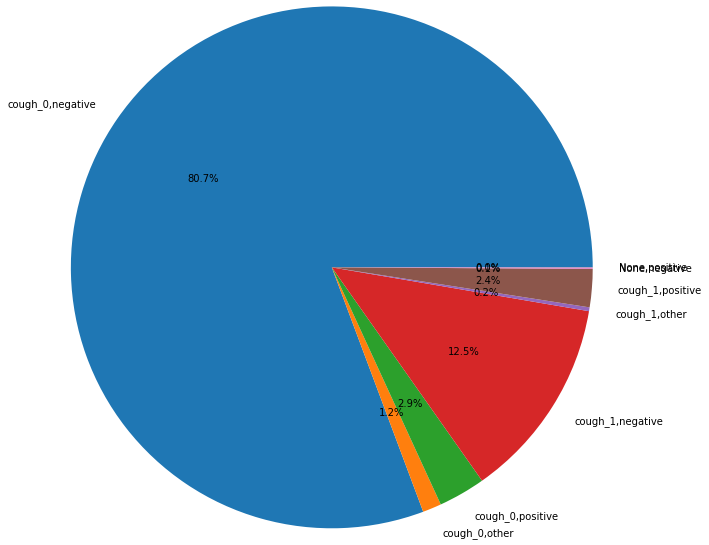

In [13]:
plt.pie(df_cough.values, labels =['cough_0,negative','cough_0,other','cough_0,positive','cough_1,negative','cough_1,other','cough_1,positive','None,negative','None,positive'], autopct ='%1.1f%%', radius = 3)
plt.show()